# Importing Libraries 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# split dataset into train and test
from sklearn.model_selection import train_test_split

# Feature scaling
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Support vector classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score, cross_val_predict


# Loading Data

In [2]:
# df = pd.read_csv('C:/Users/kashy/Documents/breast cancer/breast_cancer_raw.csv')
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [3]:
cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Exploratory Data Analysis (EDA) and Processing

In [4]:
type(cancer_dataset)

sklearn.utils.Bunch

In [5]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
type(cancer_dataset['data'])

numpy.ndarray

In [7]:
cancer_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [74]:
unique, counts = np.unique(cancer_dataset['target'], return_counts=True)
dict(zip(unique, counts))

{0: 212, 1: 357}

In [8]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
print(cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
# Create Data Frame

In [11]:
# create datafrmae
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
             columns = np.append(cancer_dataset['feature_names'], ['target']))

In [12]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [15]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


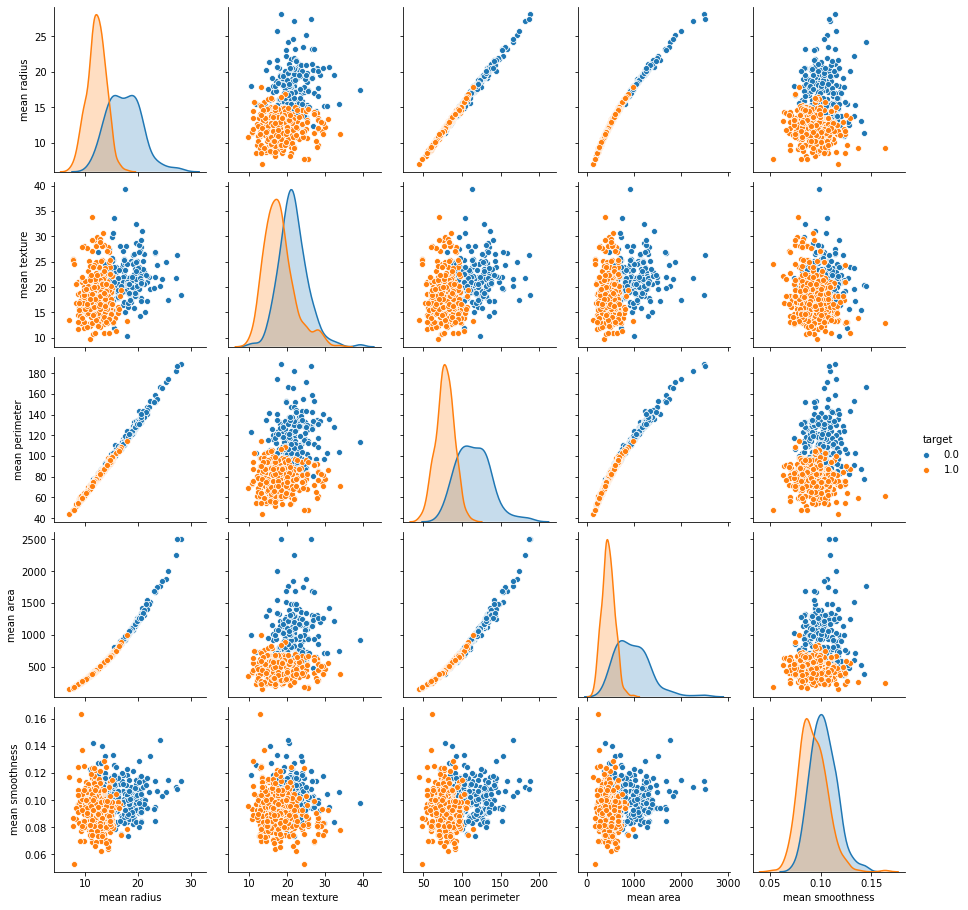

In [16]:
# pair plot of sample feature
sns.pairplot(cancer_df, hue = 'target', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

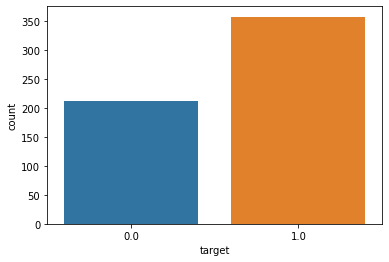

In [17]:
# Count the target class
sns.countplot(cancer_df['target'])

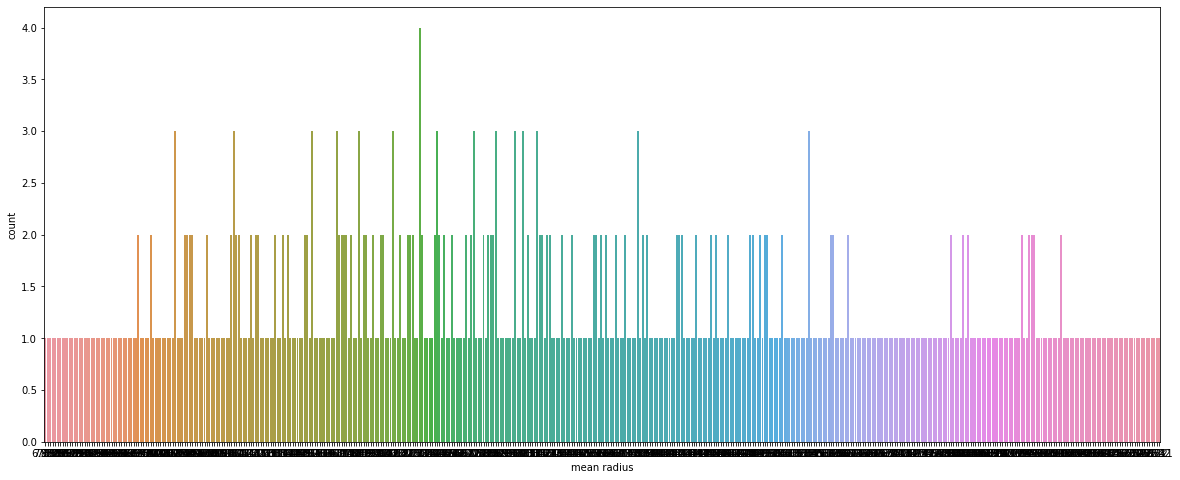

In [18]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(cancer_df['mean radius'])

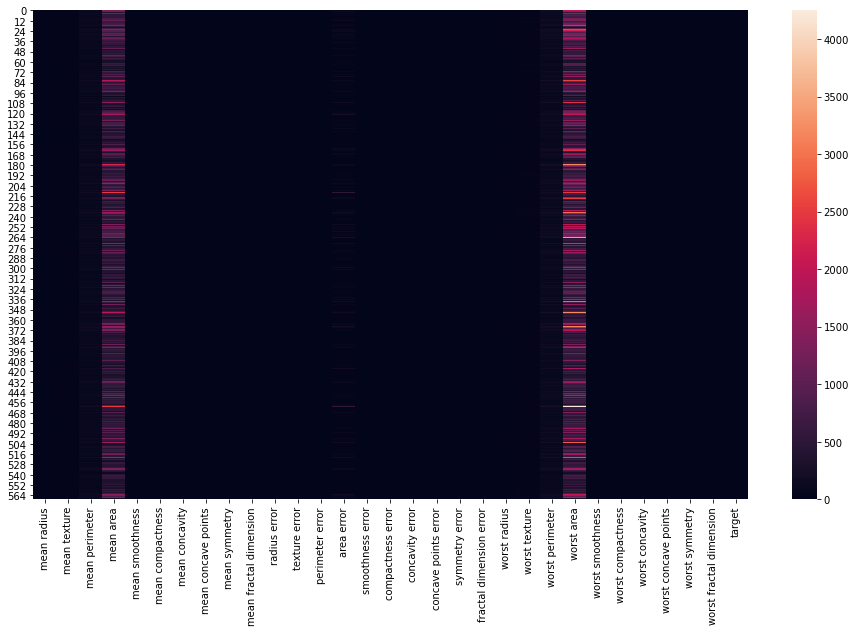

In [19]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(cancer_df)

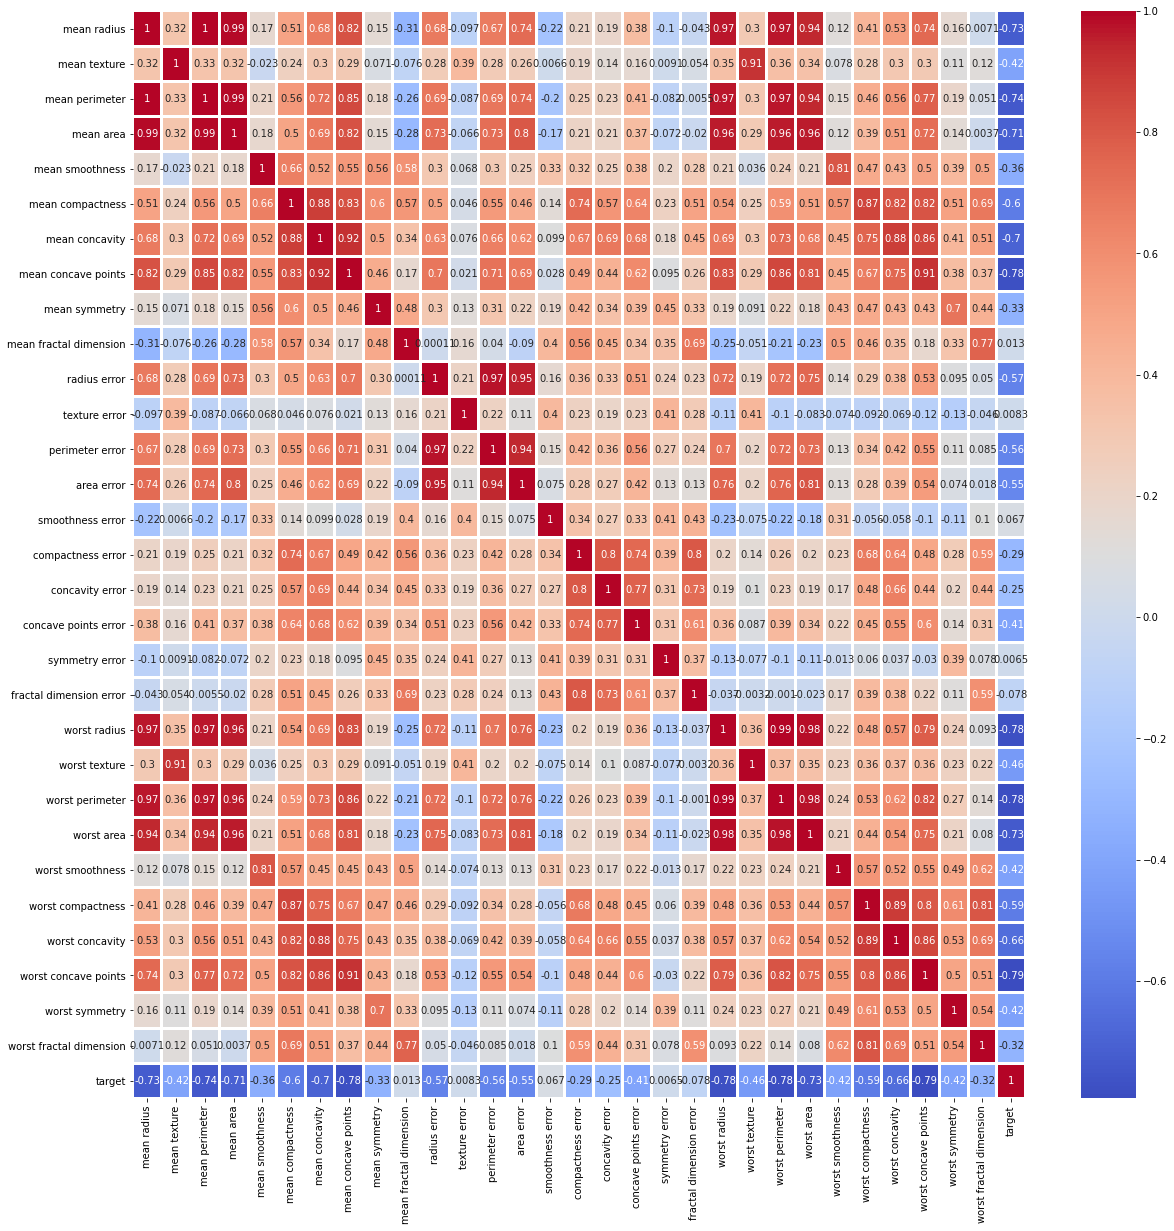

In [20]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [21]:
# create second DataFrame by droping target
cancer_df2 = cancer_df.drop(['target'], axis = 1)
print("The shape of 'cancer_df2' is : ", cancer_df2.shape)

The shape of 'cancer_df2' is :  (569, 30)


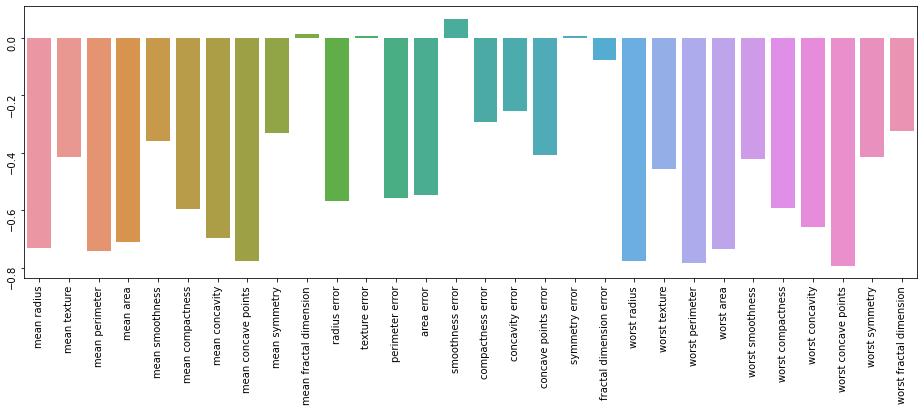

In [22]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(cancer_df2.corrwith(cancer_df.target).index, cancer_df2.corrwith(cancer_df.target))
ax.tick_params(labelrotation = 90)

In [23]:
# input variable
X = cancer_df.drop(['target'], axis = 1)
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [24]:
# output variable
y = cancer_df['target']
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

# Split Dataset into train and test

In [25]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

# Feature scaling

In [26]:
# Feature scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [75]:
X_sc = sc.fit_transform(X)

# Support vector classifier

In [27]:
# Support vector classifier

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9385964912280702

In [60]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
svc_score = accuracy_score(y_test, y_pred_svc_sc)
svc_score

0.9649122807017544

In [80]:
# Cross validation score

svc_cv_score=cross_val_score(svc_classifier2,X_sc, y,cv=10)
svc_cv_score.mean()

0.9770989974937342

In [121]:
# confusion_matrix of cross validation
svc_cv_pred=cross_val_predict(svc_classifier2,X_sc, y,cv=10)
svc_cm = confusion_matrix(y, svc_cv_pred)
svc_cm

array([[204,   8],
       [  5, 352]], dtype=int64)

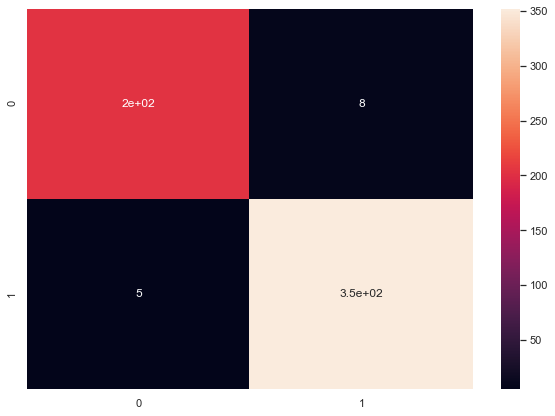

In [130]:
plt.figure(figsize=(10,7))
sns.heatmap(svc_cm, annot=True)
plt.show()

# Logistic Regression

In [90]:
# Logistic Regression

lr_classifier = LogisticRegression(C=1, penalty='l2', solver='liblinear',random_state = 51)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
lr_score = accuracy_score(y_test, y_pred_lr)
lr_score

0.9736842105263158

In [91]:
# Cross validation score

lr_cv_score=cross_val_score(lr_classifier,X, y,cv=10)
lr_cv_score.mean()

0.9490601503759398

In [92]:
# Train with Standard scaled Data
lr_classifier2 = LogisticRegression(C=1, penalty='l2', solver='liblinear',random_state = 51)
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.5877192982456141

In [123]:
# Cross validation score

lr_cv_sc_score=cross_val_score(lr_classifier2,X_sc, y,cv=10)
lr_cv_sc_score.mean()

0.9824248120300751

In [124]:
# confusion_matrix of cross validation
lr_cv_pred=cross_val_predict(lr_classifier2,X_sc, y,cv=10)
lr_cm = confusion_matrix(y, lr_cv_pred)
lr_cm

array([[205,   7],
       [  3, 354]], dtype=int64)

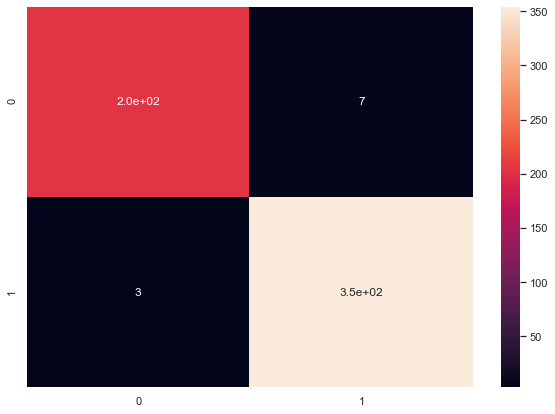

In [131]:
plt.figure(figsize=(10,7))
sns.heatmap(lr_cm, annot=True)
plt.show()

# K – Nearest Neighbor Classifier

In [58]:
# K – Nearest Neighbor Classifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.9385964912280702

In [95]:
# Cross validation score

knn_cv_score=cross_val_score(knn_classifier,X, y,cv=10)
knn_cv_score.mean()

0.9297619047619046

In [32]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.5789473684210527

In [96]:
# Cross validation score

knn_cv_sc_score=cross_val_score(knn_classifier2,X_sc, y,cv=10)
knn_cv_sc_score.mean()

0.9666353383458647

In [125]:
# confusion_matrix of cross validation
knn_cv_pred=cross_val_predict(knn_classifier2,X_sc, y,cv=10)
knn_cm = confusion_matrix(y, knn_cv_pred)
knn_cm

array([[197,  15],
       [  4, 353]], dtype=int64)

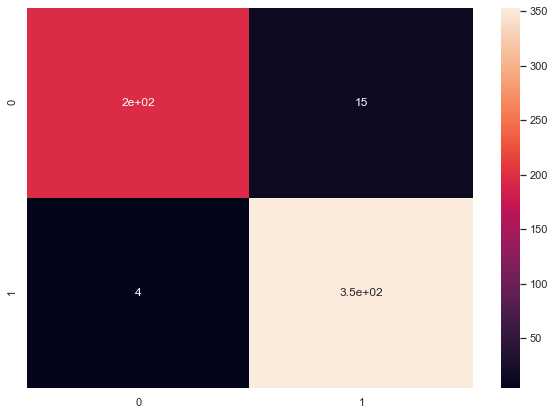

In [132]:
plt.figure(figsize=(10,7))
sns.heatmap(knn_cm, annot=True)
plt.show()

# Naive Bayes Classifier

In [83]:
# Naive Bayes Classifier

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_score = accuracy_score(y_test, y_pred_nb)
nb_score

0.9473684210526315

In [98]:
# Cross validation score

nb_cv_score=cross_val_score(nb_classifier,X, y,cv=10)
nb_cv_score.mean()

0.9367794486215537

In [55]:
# Train with Standard scaled Data
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.9385964912280702

In [100]:
# Cross validation score

nb_cv_sc_score=cross_val_score(nb_classifier2,X_sc, y,cv=10)
nb_cv_sc_score.mean()

0.9315162907268169

# Decision Tree Classifier

In [57]:
# Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_score = accuracy_score(y_test, y_pred_dt)
dt_score

0.9473684210526315

In [101]:
# Cross validation score

dt_cv_score=cross_val_score(dt_classifier,X, y,cv=10)
dt_cv_score.mean()

0.931422305764411

In [36]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7543859649122807

# Random Forest Classifier

In [59]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
rf_score = accuracy_score(y_test, y_pred_rf)
rf_score

0.9736842105263158

In [107]:
# Cross validation score

rf_cv_score=cross_val_score(rf_classifier,X, y,cv=3)
rf_cv_score.mean()

0.9613385315139701

In [38]:
# Train with Standard scaled Data
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.7543859649122807

# Adaboost Classifier

In [61]:
# Adaboost Classifier

adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
ada_score = accuracy_score(y_test, y_pred_adb)
ada_score

0.9473684210526315

In [112]:
# Cross validation score

adb_cv_score=cross_val_score(adb_classifier,X, y,cv=10)
adb_cv_score.mean()

0.9279135338345865

In [40]:
# Train with Standard scaled Data
adb_classifier2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier2.fit(X_train_sc, y_train)
y_pred_adb_sc = adb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_adb_sc)

0.9473684210526315

In [109]:
# Cross validation score

adb_cv_sc_score=cross_val_score(adb_classifier2,X_sc, y,cv=10)
adb_cv_sc_score.mean()

0.9279135338345865

# XGBoost Classifier

In [62]:
# XGBoost Classifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred_xgb)
xgb_score

C:\Users\kashy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9824561403508771

In [127]:
# confusion_matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_cm

array([[46,  2],
       [ 0, 66]], dtype=int64)

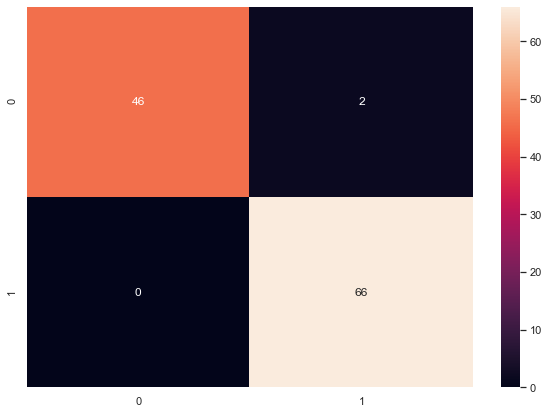

In [133]:
plt.figure(figsize=(10,7))
sns.heatmap(xgb_cm, annot=True)
plt.show()

In [114]:
# Cross validation score

xgb_cv_score=cross_val_score(xgb_classifier,X, y,cv=5)
xgb_cv_score.mean()

C:\Users\kashy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.9771619313771154

In [42]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

[17:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9824561403508771

In [134]:
# confusion_matrix
xgb_cm_sc = confusion_matrix(y_test, y_pred_xgb_sc)
xgb_cm_sc

array([[46,  2],
       [ 0, 66]], dtype=int64)

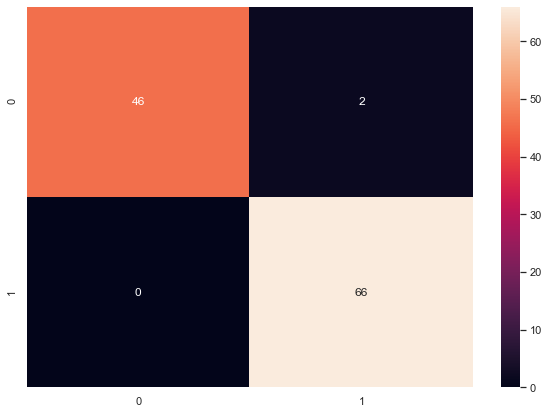

In [135]:
plt.figure(figsize=(10,7))
sns.heatmap(xgb_cm_sc, annot=True)
plt.show()

# XGBoost classifier Randomized Search

In [43]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [44]:
# Randomized Search

random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.7s finished
C:\Users\kashy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1,
          

In [45]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [46]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
 
xgb_model_pt2=xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_model_pt2.predict(X_test)

[17:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
accuracy_score(y_test, y_pred_xgb_pt)

0.9736842105263158

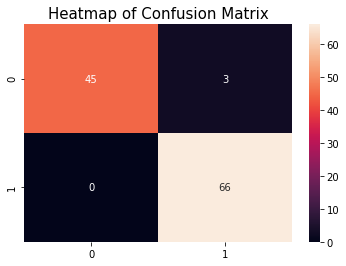

In [49]:
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [50]:
print(classification_report(y_test, y_pred_xgb_pt))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [51]:
# Cross validation

cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())


cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = X_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

[17:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kashy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\kashy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [64]:
scores = [lr_score, nb_score, svc_score,knn_score,dt_score,rf_score,ada_score,xgb_score]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Adaboost Classifier","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using ----> "+algorithms[i]+" is: ----> "+str(scores[i]*100)+" %")

The accuracy score achieved using ----> Logistic Regression is: ----> 97.36842105263158 %
The accuracy score achieved using ----> Naive Bayes is: ----> 94.73684210526315 %
The accuracy score achieved using ----> Support Vector Machine is: ----> 96.49122807017544 %
The accuracy score achieved using ----> K-Nearest Neighbors is: ----> 93.85964912280701 %
The accuracy score achieved using ----> Decision Tree is: ----> 94.73684210526315 %
The accuracy score achieved using ----> Random Forest is: ----> 97.36842105263158 %
The accuracy score achieved using ----> Adaboost Classifier is: ----> 94.73684210526315 %
The accuracy score achieved using ----> XGBoost is: ----> 98.24561403508771 %


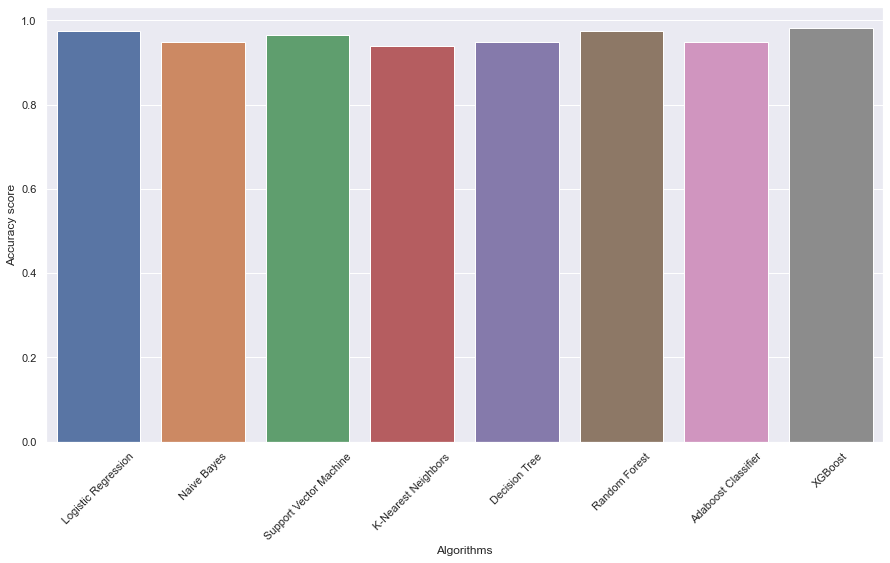

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
# plt.ylim(0.7, 1)
plt.xticks(rotation=45)

sns.barplot(algorithms,scores)

In [66]:
# XGBoost without Scaled Data
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [136]:
# XGBoost with Scaled Data
print(classification_report(y_test, y_pred_xgb_sc))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

